# Image Sharpening


### Sharp With Unsharp Mask

- first a filter is applied over the image (say gaussian filter)

- then the filtered images is subtracted from the original image

Unsharp mask enhances edges by subtracting an unsharp (smoothed) version of the image from the original. Effectively making the filter a high pass filter. 

**enhanced image = original + amount * (original - blurred)**

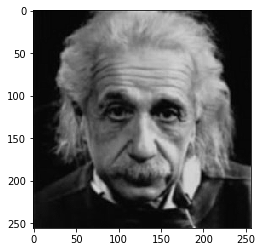

In [1]:
#This code shows that unsharp is nothing but original + amount *(original-blurred)
from skimage import io, img_as_float
from skimage.filters import unsharp_mask
from skimage.filters import gaussian

img = img_as_float(io.imread("images/einstein_blurred.jpg", as_gray=True))

gaussian_img = gaussian(img, sigma=1, mode='constant', cval=0.0)

img2 = (img - gaussian_img)*1.

img3 = img + img2

from matplotlib import pyplot as plt
plt.imshow(img3, cmap="gray")

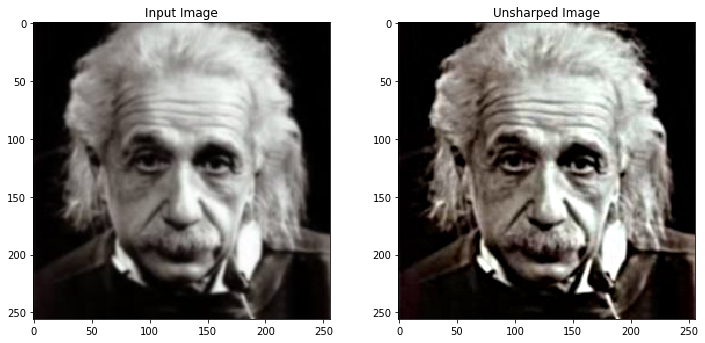

In [2]:
#Unsharp Mask
from skimage import io
from skimage.filters import unsharp_mask

img = io.imread("images/einstein_blurred.jpg")

#sharpened = unsharp_mask(image0, radius=1.0, amount=1.0)
unsharped_img = unsharp_mask(img, radius=3, amount=1)


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(unsharped_img, cmap='gray')
ax2.title.set_text('Unsharped Image')

plt.show()

- Amount of sharpening can be controlled via scaling factor, a multiplication factor for the sharpened signal. 

- `skimage` uses Gaussian smoothing for image blurring therefore the radius parameter  in the unsharp masking filter refers to the sigma parameter of the gaussian filter.

### Deconvolution

Have you ever observed that when we point the light coming out of a torch over wall, there is some halo i.e., spread of light around the point where it was exactly pointed. In image context we can say that light is spread around all the pixels in the neighbour of targeted pixel rather than the exact pixel.

Deconvolution tries to put back the intesity on the targeted pixel.The halo or the way this light is psread is called **Point Spread Function (psf)** .If we somehow know how this halo (psf) is formed we can do deconvolution. just like various predefined kernels are there in convolution, there are many predefined psf such as gaussian (gkern) etc.

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


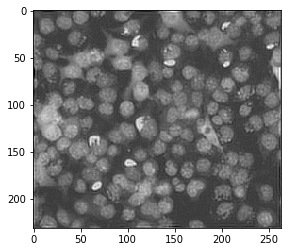

In [3]:
###############################################
#Image deconvolution

import matplotlib.pyplot as plt
from skimage import io, restoration
import numpy as np

img = io.imread("images/test_image_cropped.jpg",as_gray =True)


#PSF

psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

#The following page was used as reference to generate the kernel
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

# print(psf)

deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imshow(deconvolved, cmap='gray')

---

In [4]:
###############################################
#Image deconvolution
#Uses deconvolution to sharpen images. 

import matplotlib.pyplot as plt
from skimage import io, color, restoration, img_as_float

img = img_as_float(io.imread("images/BSE_Google_blurred.jpg"))
print(img.shape)

#PSF
import scipy.stats as st
import numpy as np

#psf = np.ones((3, 3)) / 9  #point spread function to be used for deconvolution.

#The following page was used as reference to generate the kernel
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/gsmooth.htm

def gkern(kernlen=21, nsig=2):    #Returns a 2D Gaussian kernel.

    lim = kernlen//2 + (kernlen % 2)/2
    x = np.linspace(-lim, lim, kernlen+1)
    kern1d = np.diff(st.norm.cdf(x))
    kern2d = np.outer(kern1d, kern1d)
    return kern2d/kern2d.sum()

psf = gkern(5,3)   #Kernel length and sigma
print(psf)


deconvolved, _ = restoration.unsupervised_wiener(img, psf)
plt.imsave("images/deconvolved.jpg", deconvolved, cmap='gray')

(714, 901)
[[0.003765   0.015019   0.02379159 0.015019   0.003765  ]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.02379159 0.0949073  0.15034262 0.0949073  0.02379159]
 [0.015019   0.05991246 0.0949073  0.05991246 0.015019  ]
 [0.003765   0.015019   0.02379159 0.015019   0.003765  ]]


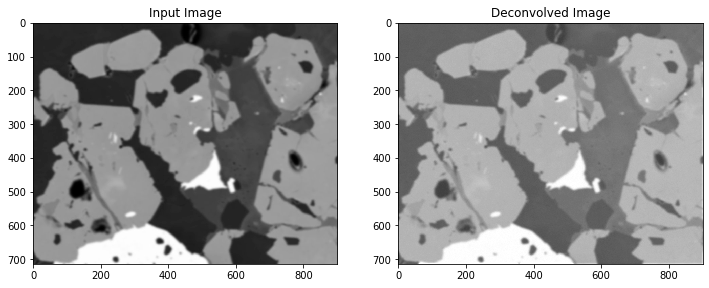

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(deconvolved, cmap='gray')
ax2.title.set_text('Deconvolved Image')

plt.show()

---